In [1]:
from modules.dataset import SAMDataset
from modules.model import SAM
from modules.lora import fetch_lora_regex

/home/msuleman/ml20_scratch/msul0021/miniconda/conda/envs/fyp_dinov2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
num_classes = 5
image_size = 512
vit_patch_size = 8
pretrained_path = 'facebook/sam-vit-base'
lora_layers = lora_rank = lora_alpha = None
lora_regex, normal_layers = fetch_lora_regex(lora_layers)

model = SAM(pretrained_path, 
            num_classes=num_classes, 
            image_size=image_size, 
            vit_patch_size=vit_patch_size, 
            lora_regex=lora_regex, 
            normal_regex=normal_layers, 
            lora_rank=lora_rank, 
            lora_alpha=lora_alpha)

root, annFile = '../data/train', '../data/annotations/train.json'
trainset = SAMDataset(root, annFile, image_size, means=[-1.8163, -1.9570, -1.7297], stds=[0.8139, 0.4834, 0.4621])

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [ ]:
model.load('saves/test.ckpt')

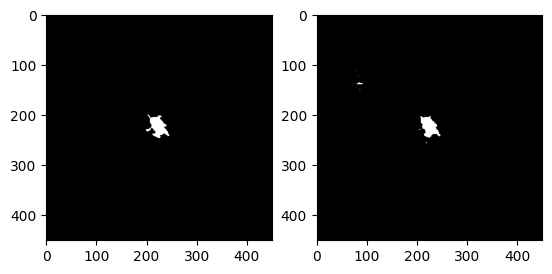

In [69]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

img, tgt = trainset[59]
pred = model.forward(img.unsqueeze(0), tgt.shape[-2:])
jack = pred
pred = pred.argmax(dim=1)

plt.subplot(1, 2, 1)
plt.imshow(tgt, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(pred.squeeze().detach().cpu(), cmap='gray')

In [74]:
from torchmetrics.functional import f1_score

print(f1_score(pred.squeeze().detach().cpu(), tgt, task="multiclass", num_classes=5, average='none'))

tensor([0.9995, 0.0000, 0.0000, 0.0000, 0.0000])


In [75]:
np.unique(pred.squeeze().detach().cpu())

array([0, 1])

In [76]:
np.unique(tgt)

array([0, 2])

In [77]:
sum(sum(sum(F.softmax(jack)[:, 0] > 0.5)))

/tmp/ipykernel_3889/849531063.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  sum(sum(sum(F.softmax(jack)[:, 0] > 0.5)))


tensor(201312, device='cuda:0')